#### **Exercice 2** : Developpement limité 

Soit la fonction $f(x)=\frac{1+x+x^2}{(1-x)(1+x)}$

A l'aide de la librairie *sympy*, calculons les $f^{'}$ et $f''$

In [24]:
import sympy as sp
import matplotlib.pyplot as plt

In [99]:
x = sp.Symbol('x')
f = (1+x+x**2)/((1-x)*(1+x))  # define the function to differentiate
diff_1_fx = sp.diff(f, x)     # differentiate the function with respect to x
diff_2_fx = sp.diff(diff_1_fx, x)

sp.pprint(diff_1_fx)
sp.pprint(diff_2_fx)

                      2                  2           
    2⋅x + 1          x  + x + 1         x  + x + 1   
─────────────── - ──────────────── + ────────────────
(1 - x)⋅(x + 1)                  2          2        
                  (1 - x)⋅(x + 1)    (1 - x) ⋅(x + 1)
                                        ⎛ 2        ⎞                          
       2            2⋅(2⋅x + 1)       2⋅⎝x  + x + 1⎠      2⋅(2⋅x + 1)        2
─────────────── - ──────────────── + ──────────────── + ──────────────── - ───
(1 - x)⋅(x + 1)                  2                  3          2              
                  (1 - x)⋅(x + 1)    (1 - x)⋅(x + 1)    (1 - x) ⋅(x + 1)   (1 

 ⎛ 2        ⎞       ⎛ 2        ⎞ 
⋅⎝x  + x + 1⎠     2⋅⎝x  + x + 1⎠ 
────────────── + ────────────────
    2        2          3        
- x) ⋅(x + 1)    (1 - x) ⋅(x + 1)


Dans la suite, on va noter, respectivement $P_1$ et $P_2$ la partie polynomiale u developpement limité à l'ordre respective 1 et 2 de la fonction $f$ au voisinage de 0. On a donc $P_1(x) = f(0) + f'(0)x$ et $P_2(x) = f(0) + f'(0)x + \frac{f''(0)x^2}{2}$

In [22]:
P1 = f.subs(x, 0) + diff_1_fx.subs(x,0)*x
P2 = f.subs(x, 0) + diff_1_fx.subs(x,0)*x + (diff_2_fx.subs(x,0)*x**2)/2
sp.pprint(P1)
sp.pprint(P2)

x + 1
   2        
2⋅x  + x + 1


Visualisons, sur un même graphique la fonction $f$ et la tangente donnée par $P_1$. On choisira un voisinage de 0 qui convient. 

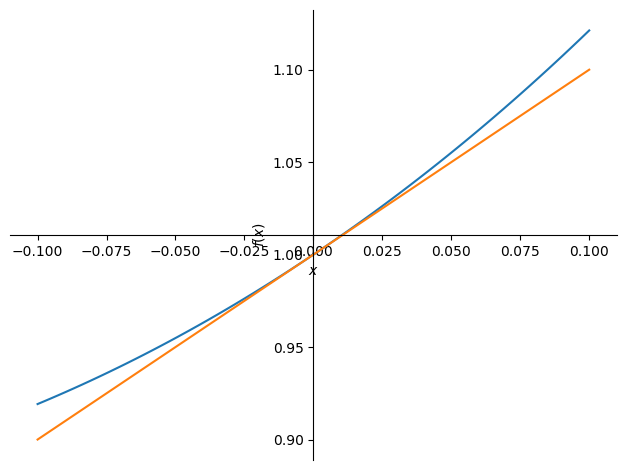

In [31]:
sp.plot(f,P1, (x, -0.1, 0.1))
plt.show()

Visualisons sur un autre graphique la fonction $f$ et l'approximation donnée par $P_2$ (choisir un voisinage adapté).

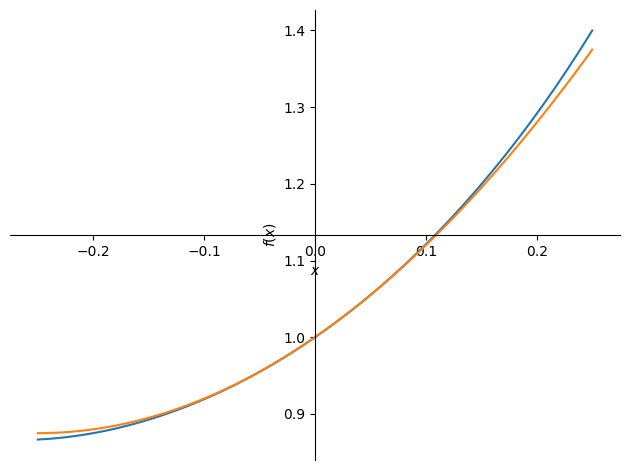

In [36]:
sp.plot(f, P2, (x, -0.25, 0.25))
plt.show()

On remarque que les deux courbes se confondent presque pour les valeurs de x entrent [-0.20, 0.20]

Trouvons la solution unique de l'equation $f(x) - P_2(x) - x^2 = 0 $ dans l'intervalle [0.2,1[.

In [65]:
# Define the interval [0.2, 1]
interval = sp.Interval(0.2, 1)

# Define the equation
eq = sp.Eq(f - P2 - x**2 , 0)

# Solve the equation for x
solutions = sp.solve(eq, x)

# Find the solution that is in the interval
solution_in_interval = [solutions[i] for i in range(len(solutions)) if interval.contains(solutions[i])][0]

# Print the approximated value of the solution
print(solution_in_interval.evalf(20))


0.43425854591066488219


Soit $g(x)=f(x)-P2(x)$ definie pour $x \in [0,1[$. Tracer la courbe representative de $g$ sur un intervalle adapté. 

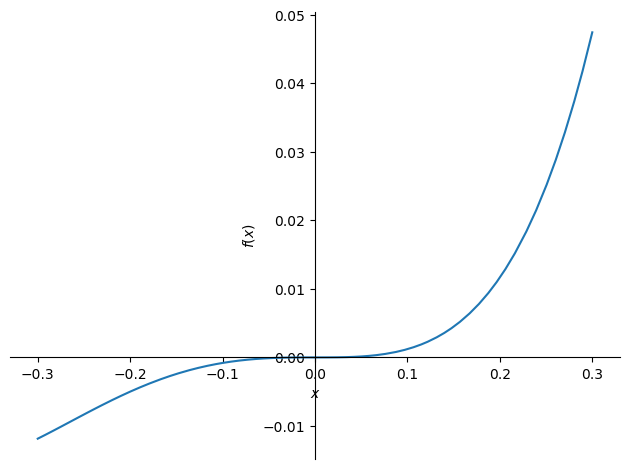

In [71]:
g = f - P2
sp.plot(g, (x, -0.3,0.3))
plt.show()

Posons $A = max\{x; g(x) \leq 0.4\}$. Trouvons une approximation de $A$ à $10^{-10}$ prés en utilisant la methode de dichotomie un ezro de la fonction $h(x) = g(x) - 0.4.$

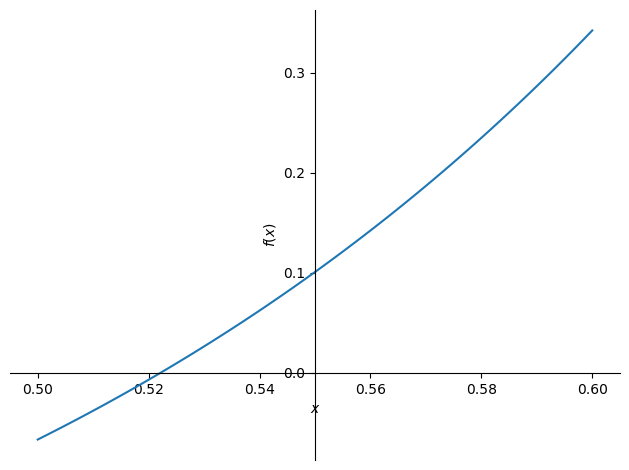

In [88]:
def dichotomy_method(f, a, b, eps):
    """
    Utilise la méthode de dichotomie pour trouver une racine de la fonction f(x) sur l'intervalle [a, b] avec
    une tolérance d'eps.
    """
    x = sp.Symbol('x')
    fa = f.subs(x, a)
    fb = f.subs(x, b)
    if fa * fb > 0:
        raise ValueError("La fonction a le même signe aux extrémités de l'intervalle.")
    while abs(b - a) > eps:
        c = (a + b) / 2
        fc = f.subs(x, c)
        if fa * fc < 0:
            b = c
            fb = fc
        else:
            a = c
            fa = fc
    return (a + b) / 2

h = g - 0.4
sp.plot(h, (x, 0.5,0.6))
plt.show()

In [90]:
dichotomy_method(h, 0.5, 0.6, 0.0000000001)

0.5221157301682979

Ecrivons une fonction $DL(n)$ qui renvoie la partie polynomiale du developpement limité d'ordre $n$ de la fonction $f$ au voisinage de 0.

In [121]:
f = (1+x+x**2)/((1-x)*(1+x)) 
def DL(n):
    P = 0
    for i in range(n+1):
        P +=  f.diff(x,i).subs(x,0)*x**i/sp.factorial(i)
    return P
DL(10)

2*x**10 + x**9 + 2*x**8 + x**7 + 2*x**6 + x**5 + 2*x**4 + x**3 + 2*x**2 + x + 1

Une valeur approchée à $10^{-10}$ près de la valeur de $A_{10} = max\{x : g_{10}(x) \leq 0.4\}$ où $g_{10}(x) = f(x) - DL(10)$.

0.7767802807036788
-0.8475413389038295


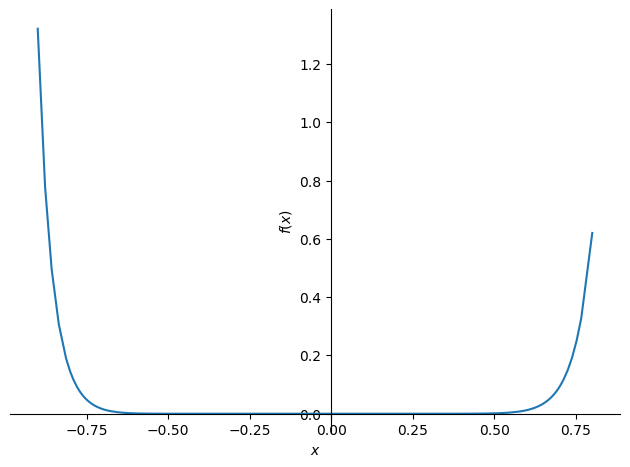

In [157]:
g10 = f-DL(10)
print(dichotomy_method(g10-0.4, 0.7, 0.8, 0.0000000001))
print(dichotomy_method(g10-0.4, -0.7, -0.9, 0.0000000001))
sp.plot(g10, (x, -0.9,0.8))
plt.show()